In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "student-mat.csv"
df = pd.read_csv(file_path)

# for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Dropping missing values
df.dropna(inplace=True)

print("Shape of the dataset:", df.shape)
print("First few rows of the dataset:\n", df.head())


Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Shape of the dataset: (395, 33)
First few rows of the dataset:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2 

In [3]:
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                  'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Detection and handle outliers using IQR
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

for col in numerical_cols:
    df = handle_outliers_iqr(df, col)

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (219, 33)


Descriptive statistics for numerical features:
               age        Medu        Fedu  traveltime   studytime  failures  \
count  219.000000  219.000000  219.000000  219.000000  219.000000     219.0   
mean    16.447489    2.881279    2.721461    1.347032    1.968037       0.0   
std      1.113195    1.098191    1.036068    0.581147    0.686623       0.0   
min     15.000000    0.000000    1.000000    1.000000    1.000000       0.0   
25%     16.000000    2.000000    2.000000    1.000000    1.500000       0.0   
50%     16.000000    3.000000    3.000000    1.000000    2.000000       0.0   
75%     17.000000    4.000000    4.000000    2.000000    2.000000       0.0   
max     20.000000    4.000000    4.000000    3.000000    3.000000       0.0   

           famrel    freetime       goout        Dalc        Walc      health  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     4.136986    3.287671    3.004566    1.283105    2.105023    3.529680 

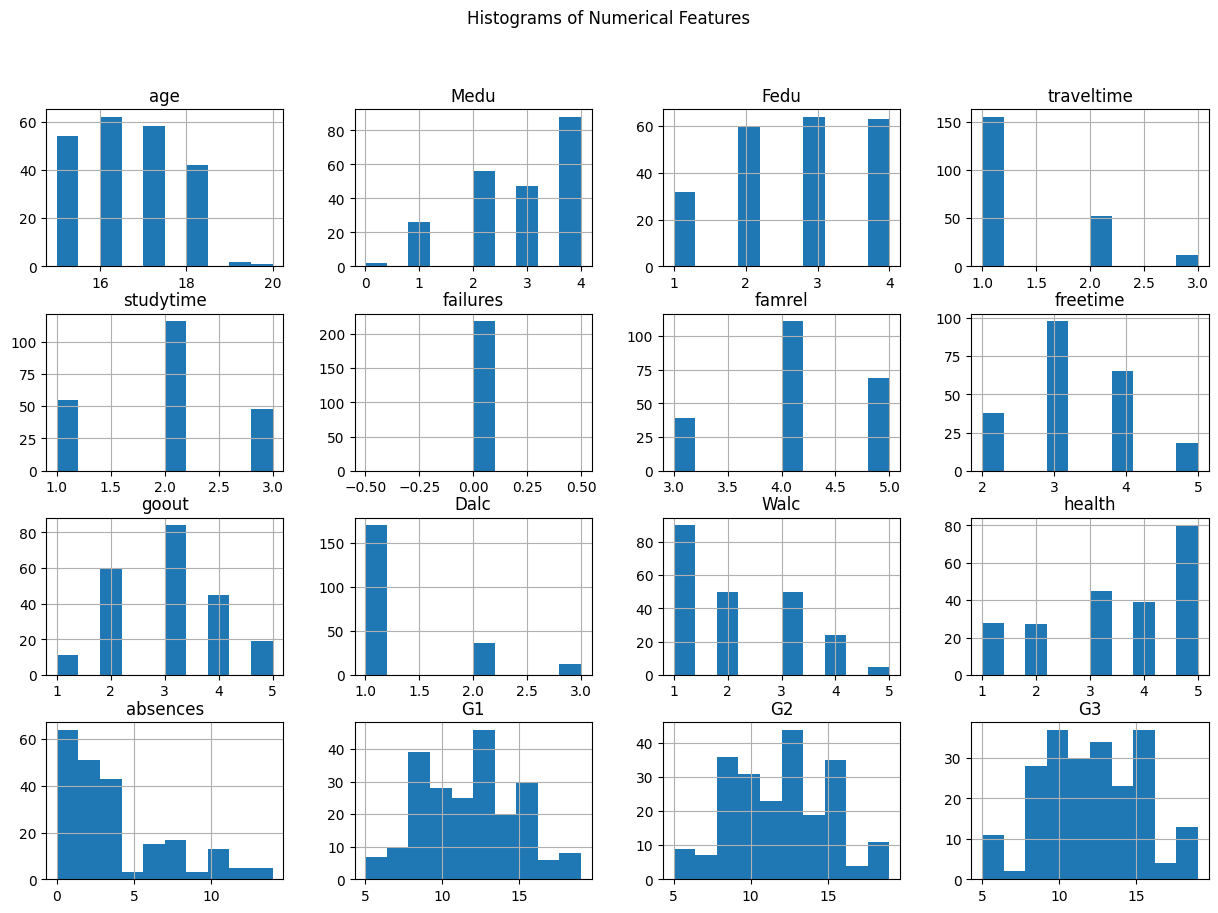

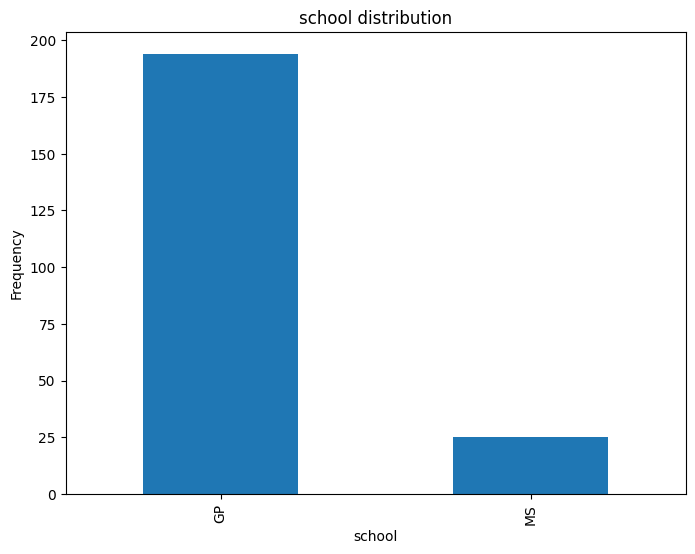

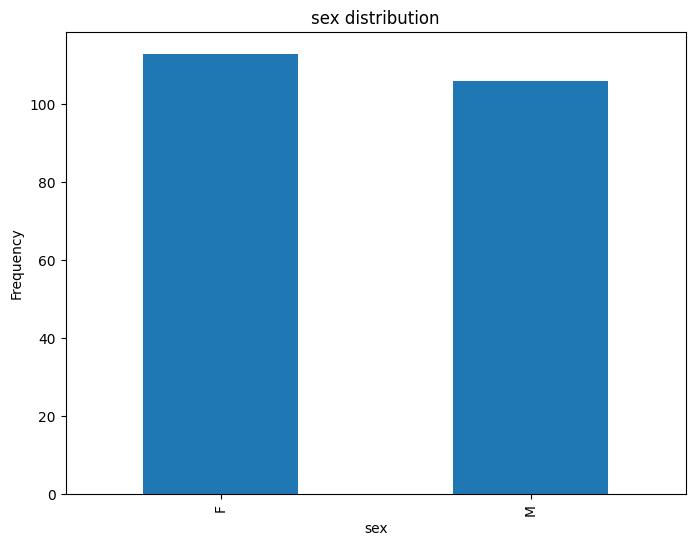

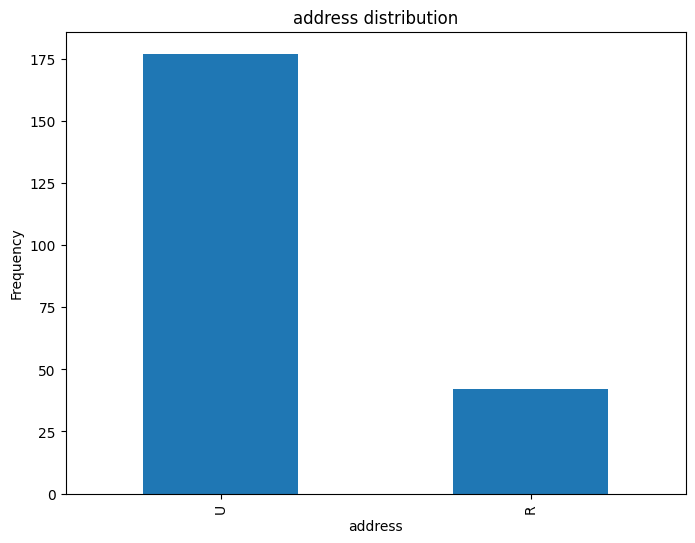

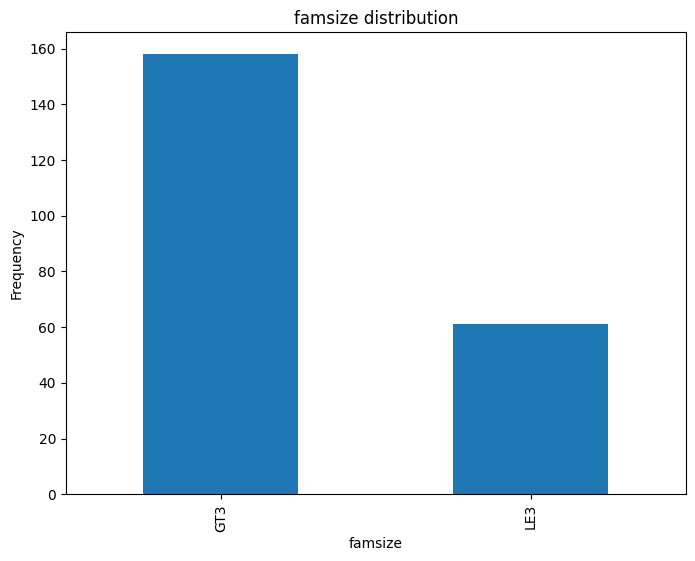

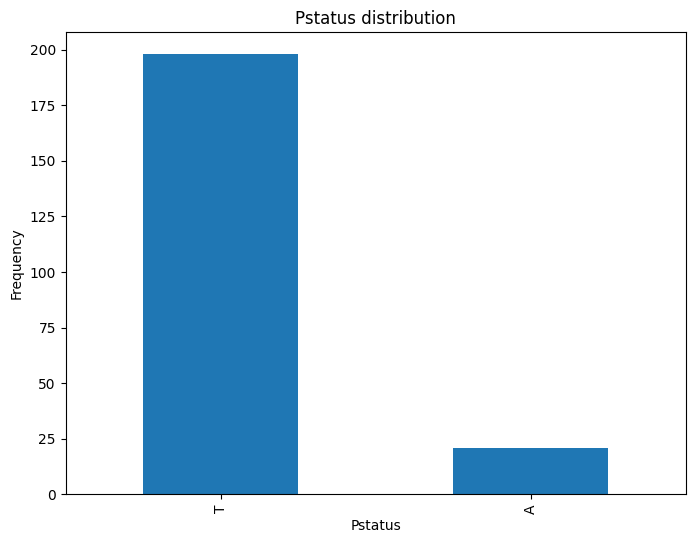

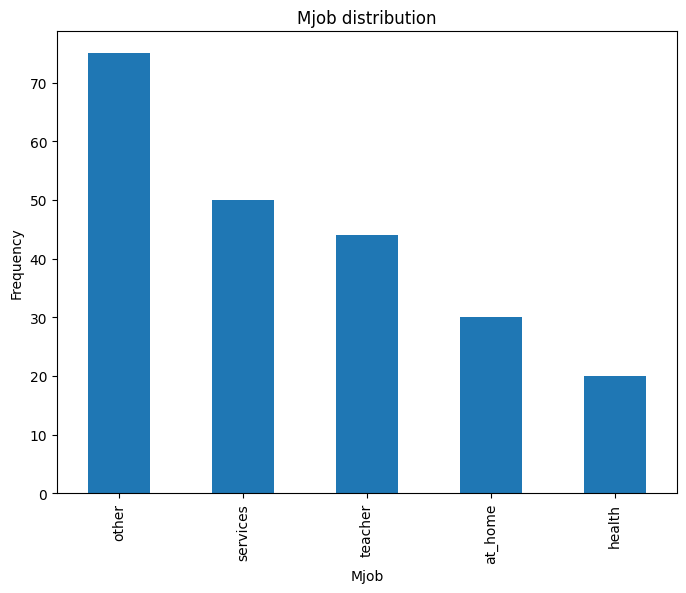

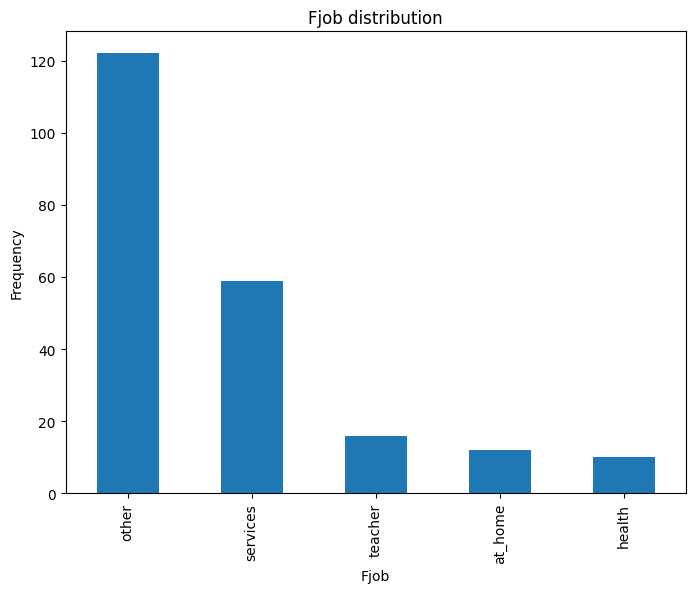

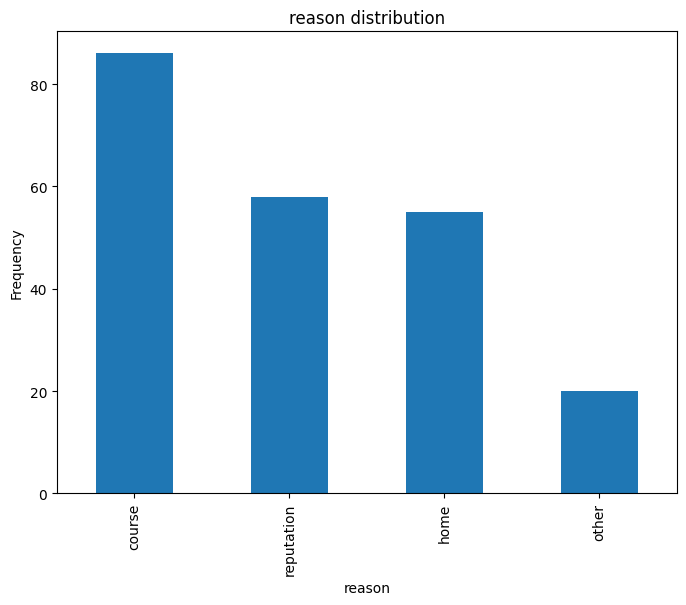

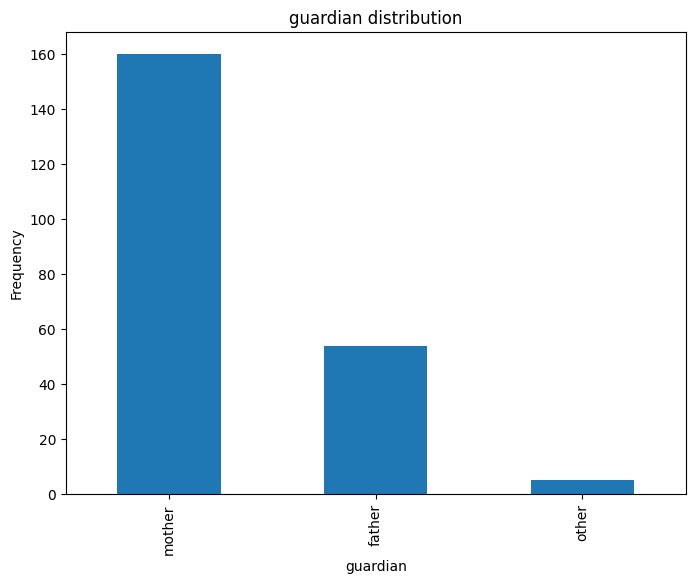

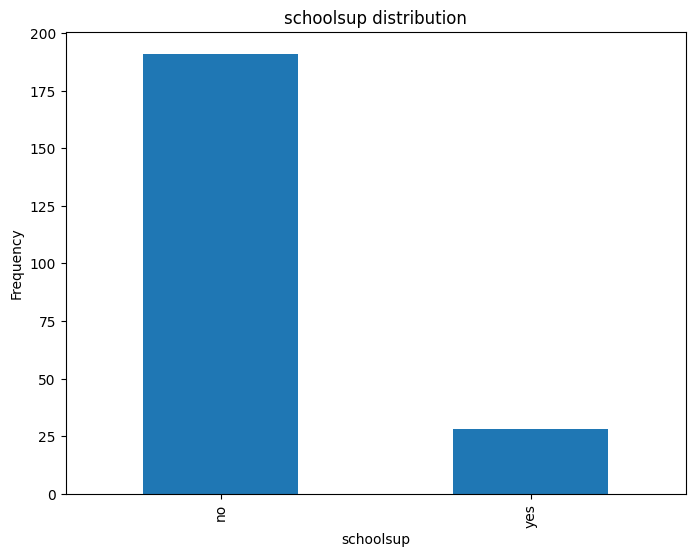

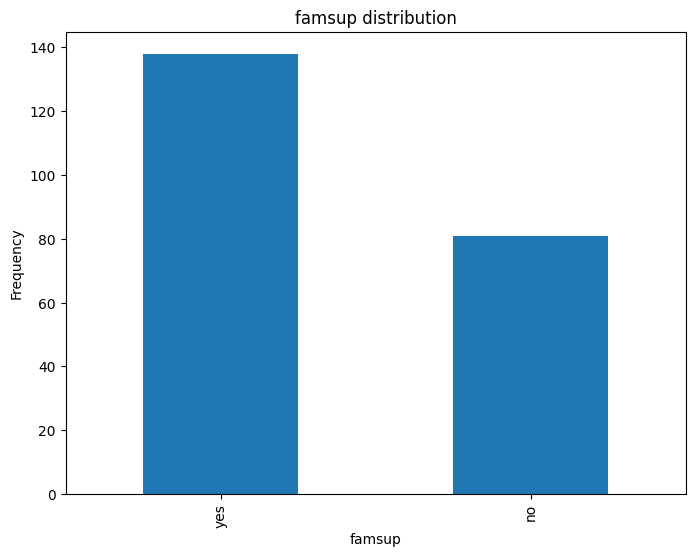

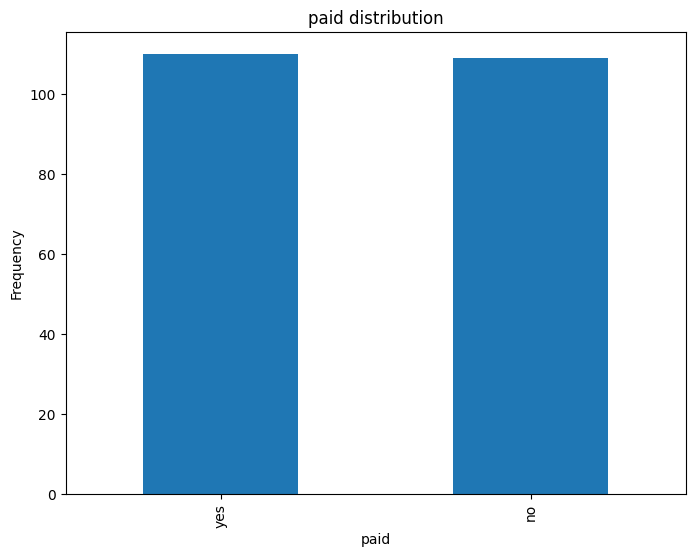

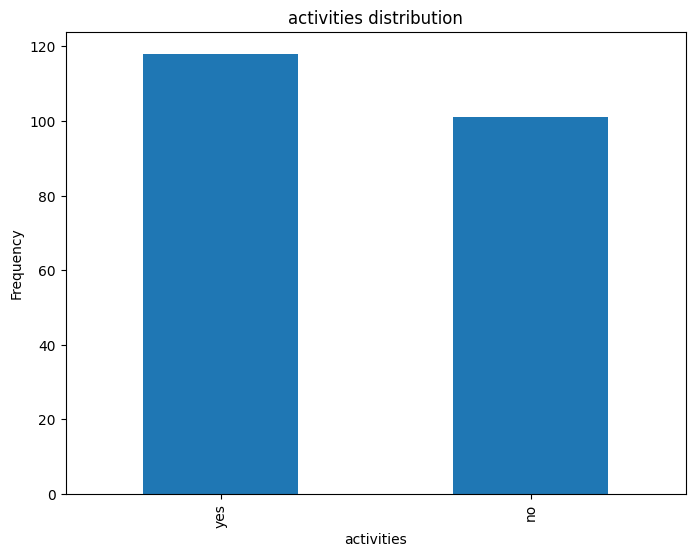

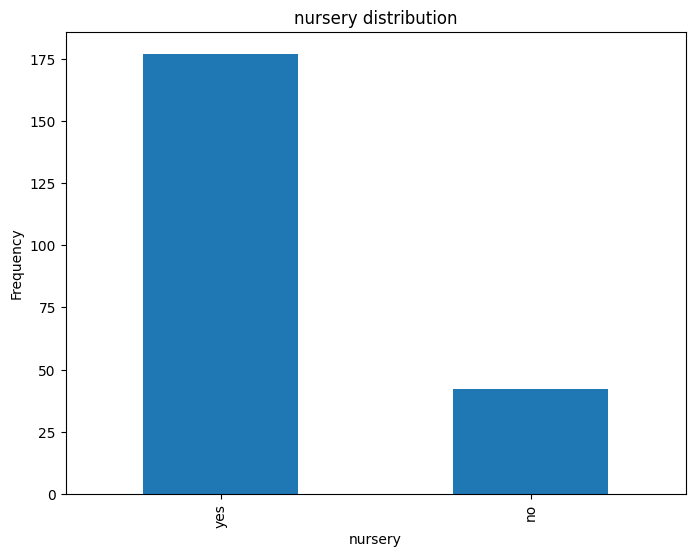

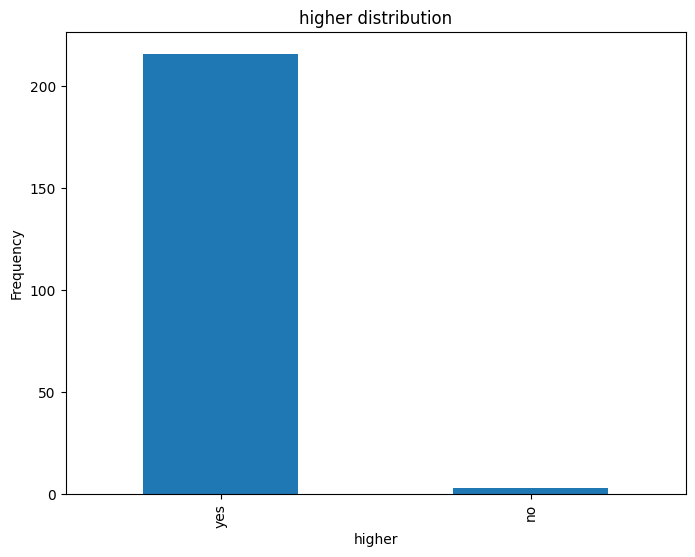

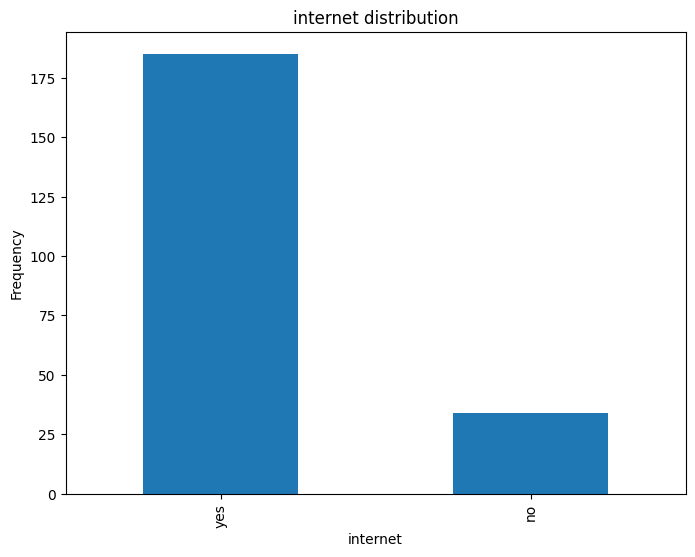

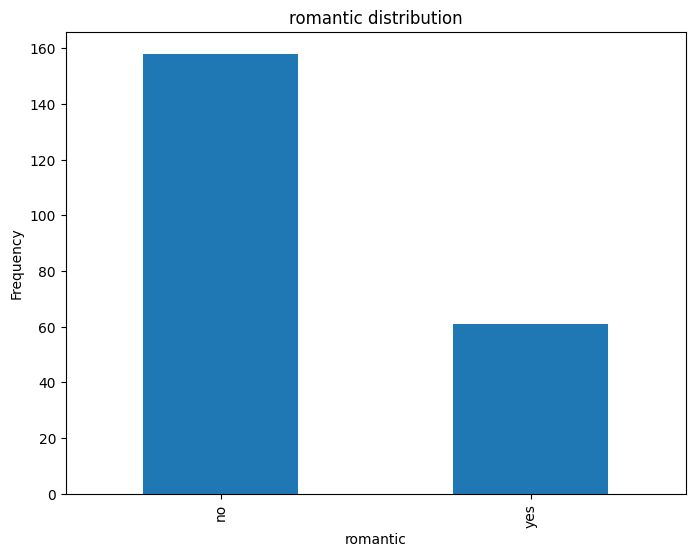

In [4]:
# Descriptive statistics
print("Descriptive statistics for numerical features:\n", df.describe())

df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Categorical feature distributions
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
                    'internet', 'romantic']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Split into features and target
X = df_encoded.drop(columns=['G3'])
y = df_encoded['G3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam',
                             max_iter=10, random_state=42)

mlp_regressor.fit(X_train, y_train)

# Evaluate on training data
y_pred_train = mlp_regressor.predict(X_train)
print("Training Metrics:")
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("R²:", r2_score(y_train, y_pred_train))

# Evaluate on test data
y_pred_test = mlp_regressor.predict(X_test)
print("Testing Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("R²:", r2_score(y_test, y_pred_test))


Training Metrics:
MSE: 128.28812638312812
MAE: 10.924492576703747
R²: -13.301550358611353
Testing Metrics:
MSE: 117.99550124106685
MAE: 10.3401598532093
R²: -9.620472836723845


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# Compare both models
print("\nModel Comparison:")
print("MLP Regressor - R²:", r2_score(y_test, y_pred_test))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
MSE: 0.6878859534908378
MAE: 0.6421580990677889
R²: 0.9380851472558458

Model Comparison:
MLP Regressor - R²: -9.620472836723845
Linear Regression - R²: 0.9380851472558458


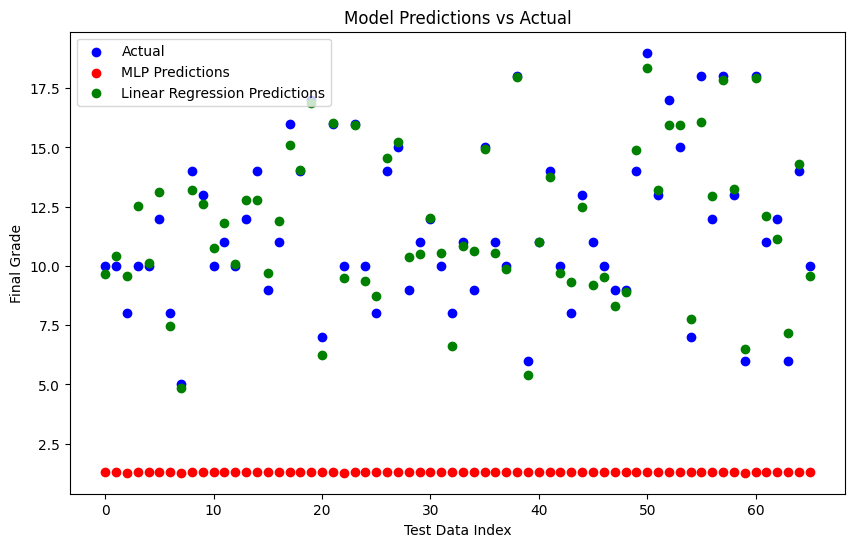

In [9]:
import matplotlib.pyplot as plt

# Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred_test)), y_pred_test, label='MLP Predictions', color='red')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, label='Linear Regression Predictions', color='green')
plt.title("Model Predictions vs Actual")
plt.xlabel("Test Data Index")
plt.ylabel("Final Grade")
plt.legend()
plt.show()
